<a href="https://colab.research.google.com/github/Dayani-Hewawasam/StudentsMarksPredictor/blob/master/Student_Performance_Analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Student Marks Predictor**
###Group Number: 30

Student Names and Registration Numbers  
1. Peiris P.R.S. (EG/2021/4706) - rpeiris4444@gmail.com  
2. Hewawasam A.D.K. (EG/2021/4556) - dayanihewawasam@gmail.com


## **Introduction**
The "Student Mark Predictor using Machine Learning" project aims to estimate students' exam scores
based on demographic and educational backgrounds. Using a dataset from Kaggle, the project will
implement supervised regression techniques like Multiple Linear Regression and Random Forest Regressor
to predict the mean of math, reading, and writing scores. The objective is to provide insights that can
help educators identify patterns and assist students more effectively.


## **Literature Survey**
Several studies have used demographic and academic data for predicting student performance.
Machine learning models like regression and decision trees have proven effective for such predictions.
This project draws from these methodologies to create a practical and deployable tool.


## **Dataset Description**
The dataset is designed to predict student performance, specifically the mean score of math, reading, and writing exams. **The target variable is the mean score**, while the features include:

1. Gender: The student's gender (male or female), potentially influencing performance.
2. Race/Ethnicity: Captures the student's racial or ethnic background, offering insights into performance trends across different demographic groups.
3. Parental level Education: The highest level of education attained by the student's parents, which can affect academic achievement.
4. Lunch: Indicates whether the student receives free/reduced or standard lunch, related to socio-economic status.
5. Test Preparation: Indicates whether the student completed a test preparation course, influencing their exam performance.
6. Math score: Represents the student's performance in the math exam, measured as a numerical score. .
7. Reading score:Indicates the student's performance in the reading exam, measured as a numerical score.
8. Writing score: Reflects the student's performance in the writing exam, measured as a numerical score.

The features collectively offer insights into various factors—demographic, socio-economic, and study habits—that influence student performance, which is measured by the mean score across math, reading, and writing exams.

**Link to Dataset**: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)


## **General ML Application Development Steps**

1. Collect data
2. Prepare Input Data
3. Analyze Input Data
4. Train the Algorithm
5. Test Teh Algorithm
6. Use it



 **Import necessary libraries**

In [ ]:
#All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ml project/StudentsPerformance.csv')



**Dataset Overview**  

In [ ]:
# Display the dimensions of the dataset
df.shape

(1000, 8)

In [ ]:
# Display a summary of the dataset, including data types, non-null counts, and memory usage
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Generate summary statistics for the numerical columns (e.g., mean, standard deviation, min, max, etc.)
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Add a new column for the target variable mean of math, reading, and writing scores
print("Target variable:mean score")
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head(10)

Target variable:mean score


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


**Exploratory Data Analysis (EDA)**

<Figure size 600x300 with 0 Axes>

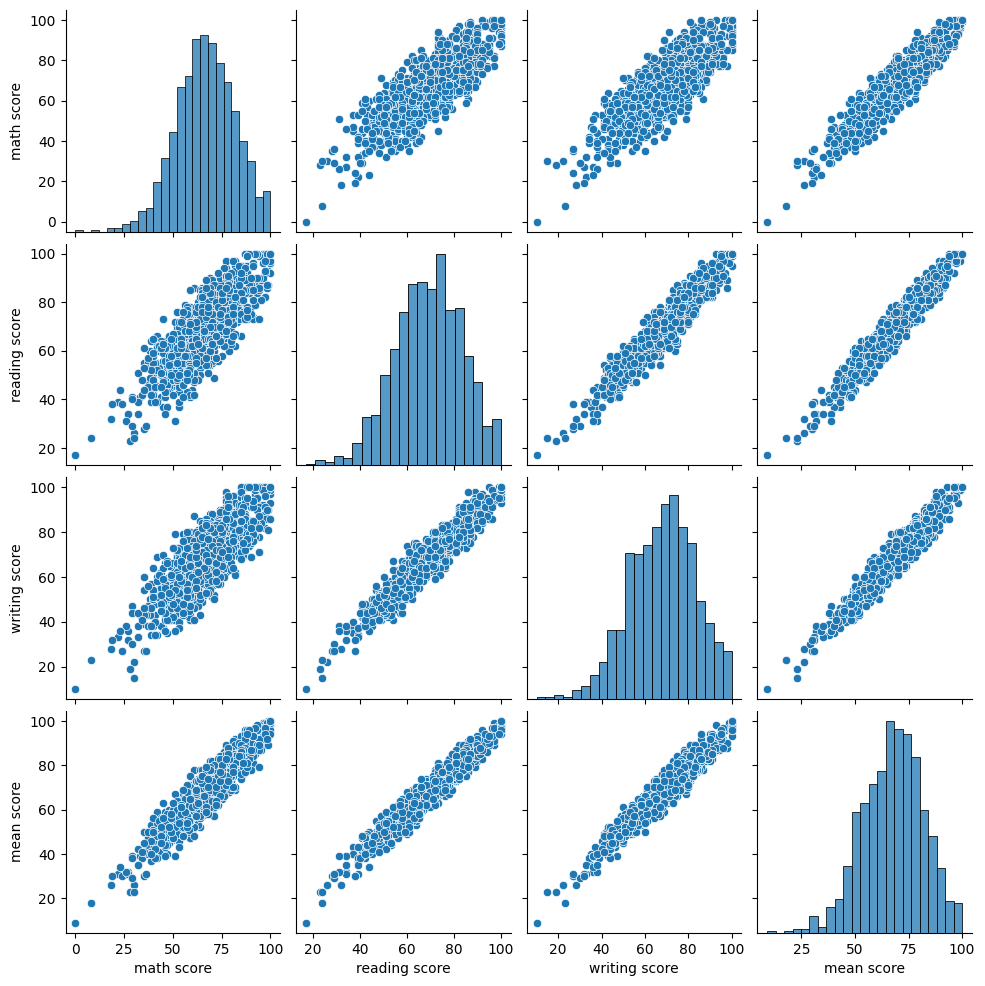

In [ ]:
#Visualizing Relationships
plt.figure(figsize = (6,3))
sns.pairplot(df)
plt.show()

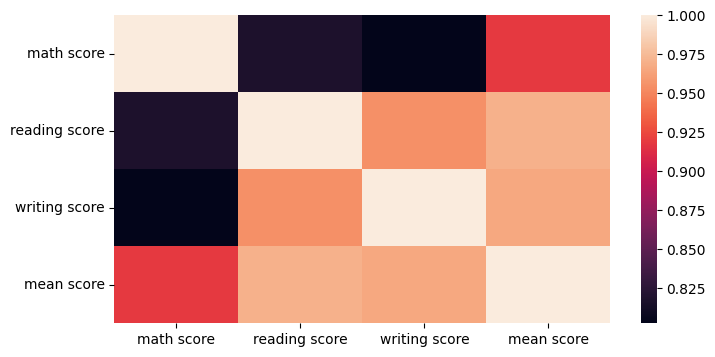

In [ ]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [ ]:
# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['number']).columns

print(f"Categorical Features: {categorical_features.tolist()}")
print(f"Numerical Features: {numerical_features.tolist()}")

Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Features: ['math score', 'reading score', 'writing score', 'mean score']


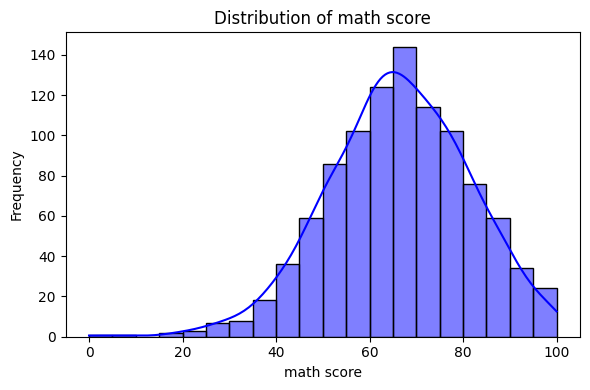

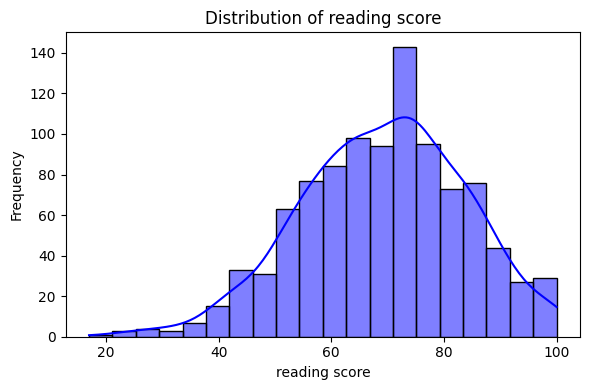

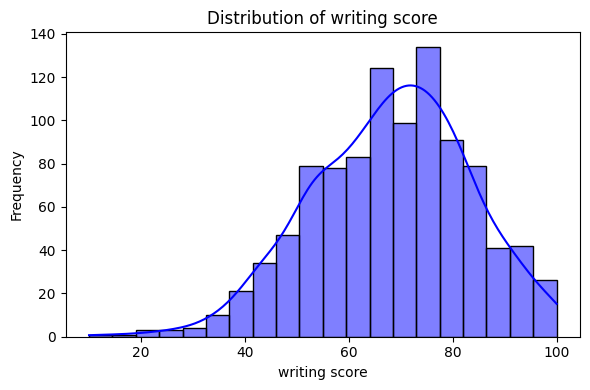

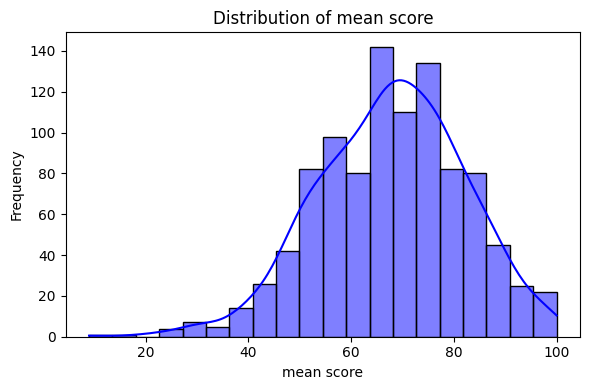

In [ ]:
# Visualize Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, color='blue', bins=20)  # Histogram for numerical data
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.tight_layout()
    plt.show()

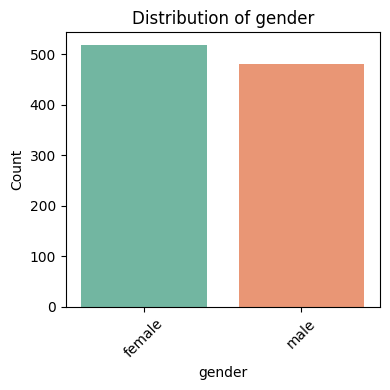

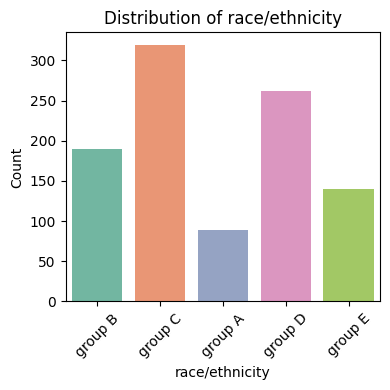

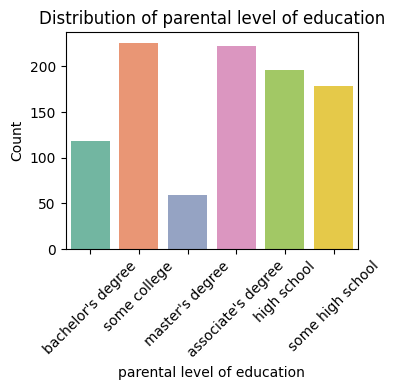

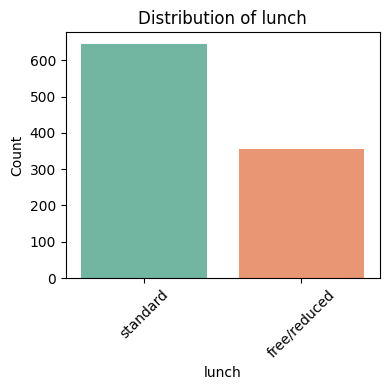

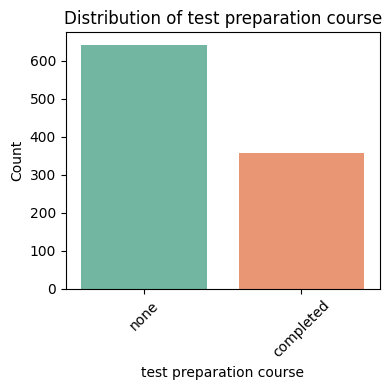

In [ ]:
# Visualize categorical features1
for feature in categorical_features:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df,hue=feature,x=feature,palette='Set2',  legend=False)  # Suppress warnings
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

#**Data Preprocessing**


1.  Importing Libraries
2.  Importing Dataset
3.  Train Test Split
4.  Handling Null/Missing Values
5.  Treating Outliers and Duplicate Records
6.  Feature Scaling
7.  Handling Categorical Variables

1,2 Steps have already done






**3.Train Test Split**

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['mean score'])
y = df['mean score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
# Display first few rows of each set
print("\nX_train sample:")
print(X_train.head())

print("\nX_test sample:")
print(X_test.head())

print("\ny_train sample:")
print(y_train.head())

print("\ny_test sample:")
print(y_test.head())


X_train sample:
     gender race/ethnicity parental level of education         lunch  \
29   female        group D             master's degree      standard   
535  female        group C           bachelor's degree  free/reduced   
695  female        group D                some college  free/reduced   
557    male        group C             master's degree  free/reduced   
836    male        group E                 high school      standard   

    test preparation course  math score  reading score  writing score  
29                     none          62             70             75  
535               completed          66             83             83  
695                    none          79             89             86  
557                    none          61             67             66  
836                    none          73             64             57  

X_test sample:
     gender race/ethnicity parental level of education         lunch  \
521  female        group C    

**4.Handling Null/Missing Values**

In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# If any, fill missing values (example: fill categorical columns with mode)
X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_test.mode().iloc[0])

Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean score                     0
dtype: int64


**5.Treating Outliers and Duplicate Records**

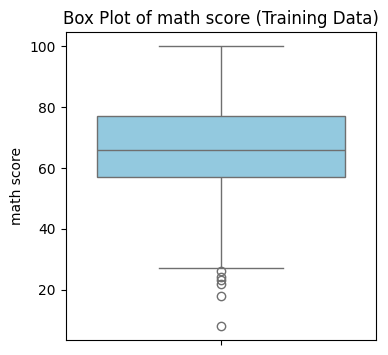

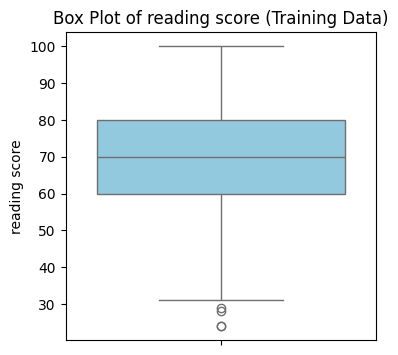

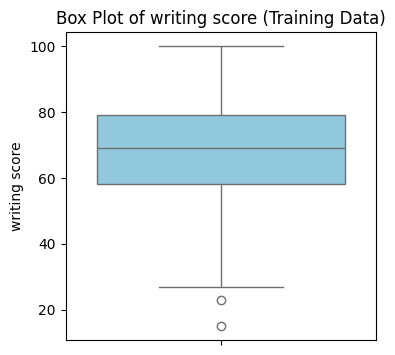

In [ ]:
# Plotting box plots for training data
numerical_features = X_train.select_dtypes(include=['number']).columns

for column in numerical_features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=X_train[column], color='skyblue')
    plt.title(f"Box Plot of {column} (Training Data)")
    plt.ylabel(column)
    plt.show()


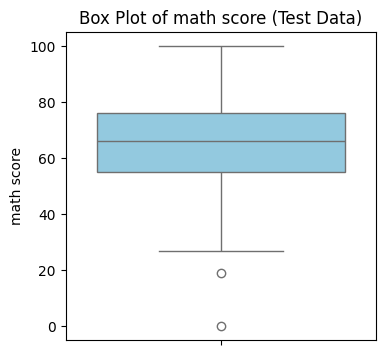

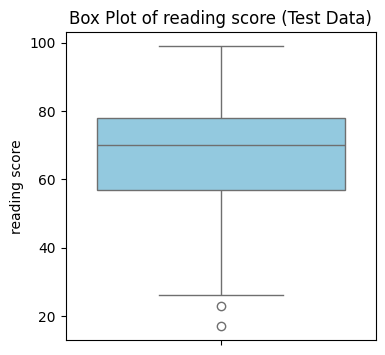

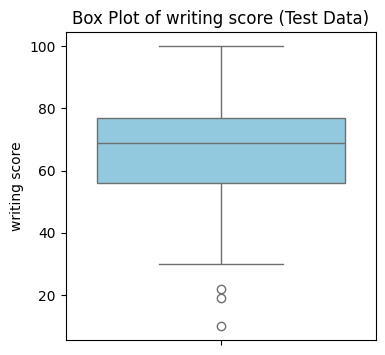

In [ ]:
# Plotting box plots for test data
for column in numerical_features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=X_test[column], color='skyblue')
    plt.title(f"Box Plot of {column} (Test Data)")
    plt.ylabel(column)
    plt.show()

In [ ]:
# Treating outliers using IQR method for train and test data separately

# For training data
X_train_cleaned = X_train.copy()  # Make a copy to avoid modifying the original dataset
for column in X_train_cleaned.select_dtypes(include=['number']).columns:
    Q1 = X_train_cleaned[column].quantile(0.25)  # First quartile
    Q3 = X_train_cleaned[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((X_train_cleaned[column] < lower_bound) | (X_train_cleaned[column] > upper_bound)).sum()
    print(f"Number of outliers in {column} (Training Data): {outliers}")

    # Remove outliers
    X_train_cleaned = X_train_cleaned[(X_train_cleaned[column] >= lower_bound) & (X_train_cleaned[column] <= upper_bound)]

print(f"Training dataset after treating outliers: {X_train_cleaned.shape}")


Number of outliers in math score (Training Data): 6
Number of outliers in reading score (Training Data): 3
Number of outliers in writing score (Training Data): 0
Training dataset after treating outliers: (791, 8)


In [ ]:
# For testing data
X_test_cleaned = X_test.copy()  # Make a copy to avoid modifying the original dataset
for column in X_test_cleaned.select_dtypes(include=['number']).columns:
    Q1 = X_test_cleaned[column].quantile(0.25)  # First quartile
    Q3 = X_test_cleaned[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((X_test_cleaned[column] < lower_bound) | (X_test_cleaned[column] > upper_bound)).sum()
    print(f"Number of outliers in {column} (Test Data): {outliers}")

    # Remove outliers
    X_test_cleaned = X_test_cleaned[(X_test_cleaned[column] >= lower_bound) & (X_test_cleaned[column] <= upper_bound)]

print(f"Testing dataset after treating outliers: {X_test_cleaned.shape}")

Number of outliers in math score (Test Data): 2
Number of outliers in reading score (Test Data): 2
Number of outliers in writing score (Test Data): 0
Testing dataset after treating outliers: (196, 8)


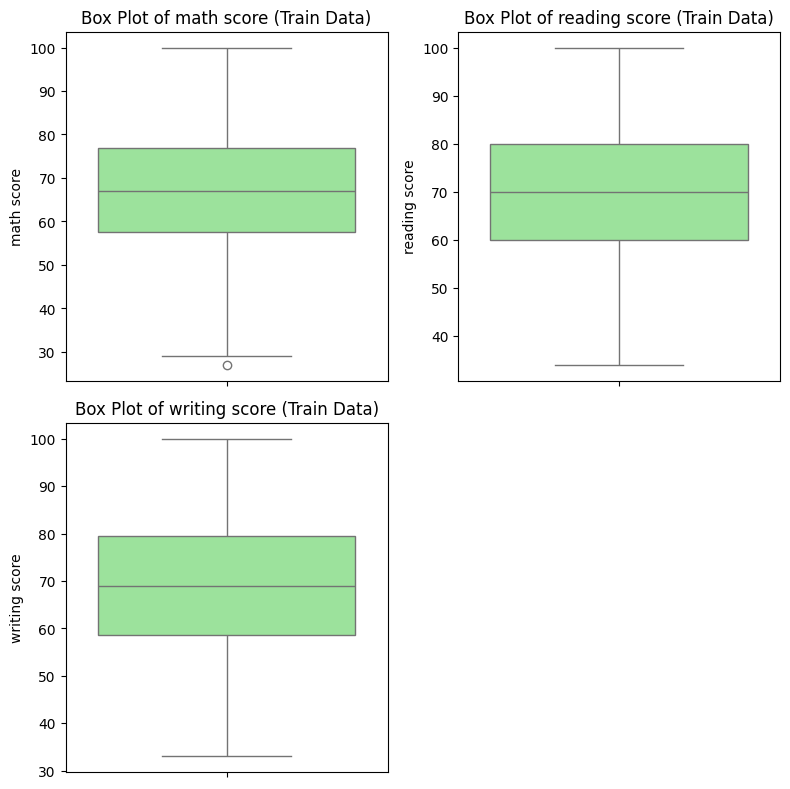

In [ ]:
# Plot boxplots for training data after removing outliers
plt.figure(figsize=(8, 8))
for i, column in enumerate(X_train_cleaned.select_dtypes(include=['number']).columns, 1):
    plt.subplot(2, len(X_train_cleaned.select_dtypes(include=['number']).columns)//2 + 1, i)
    sns.boxplot(y=X_train_cleaned[column], color='lightgreen')
    plt.title(f"Box Plot of {column} (Train Data)")

plt.tight_layout()
plt.show()


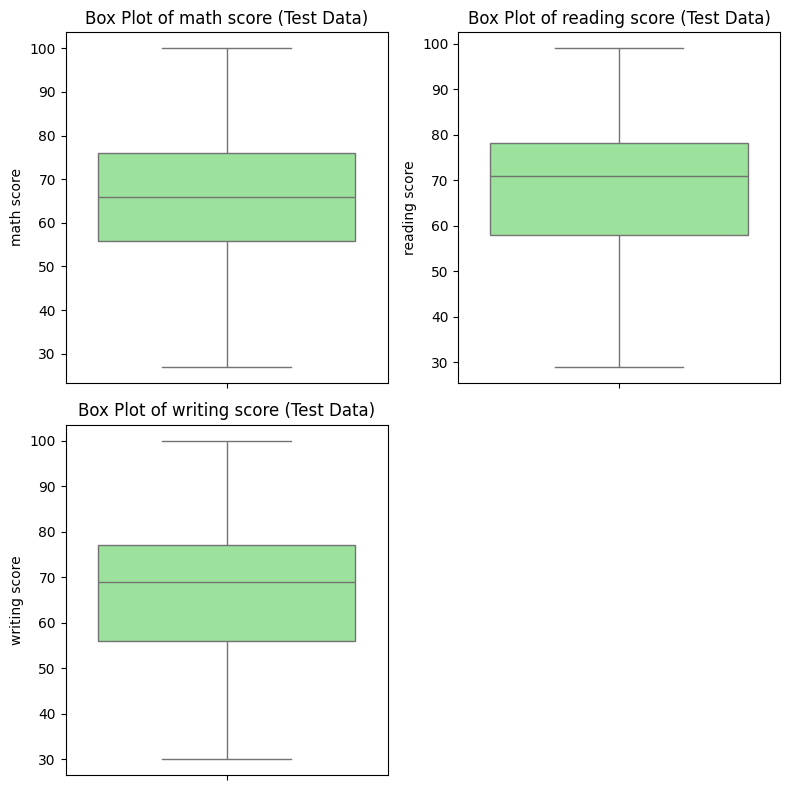

In [ ]:
# Plot boxplots for testing data after removing outliers
plt.figure(figsize=(8, 8))
for i, column in enumerate(X_test_cleaned.select_dtypes(include=['number']).columns, 1):
    plt.subplot(2, len(X_test_cleaned.select_dtypes(include=['number']).columns)//2 + 1, i)
    sns.boxplot(y=X_test_cleaned[column], color='lightgreen')
    plt.title(f"Box Plot of {column} (Test Data)")

plt.tight_layout()
plt.show()

In [ ]:
# Find duplicate rows in the training data
duplicates_train = X_train[X_train.duplicated()]
print(f"Duplicate Rows in Training Data (if any):\n{duplicates_train}")

# To show all duplicates, including the first occurrence, in the training data
all_duplicates_train = X_train[X_train.duplicated(keep=False)]
print(f"All Duplicate Rows in Training Data (including first occurrence):\n{all_duplicates_train}")


Duplicate Rows in Training Data (if any):
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
All Duplicate Rows in Training Data (including first occurrence):
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [ ]:
# Find duplicate rows in the testing data
duplicates_test = X_test[X_test.duplicated()]
print(f"Duplicate Rows in Testing Data (if any):\n{duplicates_test}")

# To show all duplicates, including the first occurrence, in the testing data
all_duplicates_test = X_test[X_test.duplicated(keep=False)]
print(f"All Duplicate Rows in Testing Data (including first occurrence):\n{all_duplicates_test}")

Duplicate Rows in Testing Data (if any):
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []
All Duplicate Rows in Testing Data (including first occurrence):
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [ ]:
# Remove duplicate records from the training data
X_train_cleaned = X_train.drop_duplicates()
print(f"Training Data after removing duplicates: {X_train_cleaned.shape}")

Training Data after removing duplicates: (800, 8)


In [ ]:
# Remove duplicate records from the testing data
X_test_cleaned = X_test.drop_duplicates()
print(f"Testing Data after removing duplicates: {X_test_cleaned.shape}")

Testing Data after removing duplicates: (200, 8)


**6.Feature Scaling**

In [ ]:
scaler = StandardScaler()

# Define numerical_columns
numerical_columns = X_train.select_dtypes(include=np.number).columns

# Apply scaling to numerical features
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
# Print scaled X_train dataset
print("Scaled X_train dataset:")
print(X_train.head())

# Print scaled X_test dataset
print("\nScaled X_test dataset:")
print(X_test.head())

Scaled X_train dataset:
     gender race/ethnicity parental level of education         lunch  \
29   female        group D             master's degree      standard   
535  female        group C           bachelor's degree  free/reduced   
695  female        group D                some college  free/reduced   
557    male        group C             master's degree  free/reduced   
836    male        group E                 high school      standard   

    test preparation course  math score  reading score  writing score  
29                     none   -0.299452       0.030791       0.434053  
535               completed   -0.033050       0.930290       0.964701  
695                    none    0.832756       1.345443       1.163694  
557                    none   -0.366053      -0.176786      -0.162925  
836                    none    0.433153      -0.384363      -0.759904  

Scaled X_test dataset:
     gender race/ethnicity parental level of education         lunch  \
521  female    

**7.Handling Categorical Variables**

In [ ]:

# Identify categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data and transform both training and testing datasets
encoded_train = encoder.fit_transform(X_train[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

# Get the new column names after encoding
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Convert encoded arrays back to DataFrames with appropriate column names
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_column_names, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_column_names, index=X_test.index)

# Drop original categorical columns and concatenate with encoded columns
X_train_encoded = pd.concat([X_train.drop(columns=categorical_columns), encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=categorical_columns), encoded_test_df], axis=1)

# Print the results
print("Encoded Training Dataset:")
print(X_train_encoded.head())

print("\nEncoded Testing Dataset:")
print(X_test_encoded.head())



Encoded Training Dataset:
     math score  reading score  writing score  gender_female  gender_male  \
29    -0.299452       0.030791       0.434053            1.0          0.0   
535   -0.033050       0.930290       0.964701            1.0          0.0   
695    0.832756       1.345443       1.163694            1.0          0.0   
557   -0.366053      -0.176786      -0.162925            0.0          1.0   
836    0.433153      -0.384363      -0.759904            0.0          1.0   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
29                      0.0                     0.0                     0.0   
535                     0.0                     0.0                     1.0   
695                     0.0                     0.0                     0.0   
557                     0.0                     0.0                     1.0   
836                     0.0                     0.0                     0.0   

     race/ethnicity_group D  race/et

In [ ]:
# Check if the original categorical columns are dropped
print("Columns after encoding (should not include the original categorical columns):")
print(X_train_encoded.columns)

# Check if the encoded columns match the expected number of categories
print("\nUnique values in original categorical columns (should match encoded columns):")
for column in categorical_columns:
    unique_values = X_train[column].unique()
    print(f"- {column}: {unique_values}")

# Check if the encoded columns exist in the encoded DataFrame
print("\nChecking if all encoded columns are present in the training dataset:")
print(X_train_encoded.head())

# Check for any remaining categorical columns (they should not exist in the encoded DataFrame)
print("\nVerifying if there are any object columns in the encoded training dataset:")
print(X_train_encoded.select_dtypes(include=['object']).columns)

# Ensure the test data has been encoded similarly
print("\nChecking the encoded testing dataset:")
print(X_test_encoded.head())

# Verifying if there are any object columns in the encoded testing dataset
print("\nVerifying if there are any object columns in the encoded testing dataset:")
print(X_test_encoded.select_dtypes(include=['object']).columns)


Columns after encoding (should not include the original categorical columns):
Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

Unique values in original categorical columns (should match encoded columns):
- gender: ['female' 'male']
- race/ethnicity: ['group D' 'group C' 'group E' 'group B' 'group A']
- parental level of education: ["maste

#**Model Training and Evaluation**

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation results
    print(f"Model: {model.__class__.__name__}")
    print("Training Performance:")
    print(f"- Mean Squared Error (MSE): {train_mse:.4f}")
    print(f"- Mean Absolute Error (MAE): {train_mae:.4f}")
    print(f"- R-squared (R²): {train_r2:.4f}")
    print("Testing Performance:")
    print(f"- Mean Squared Error (MSE): {test_mse:.4f}")
    print(f"- Mean Absolute Error (MAE): {test_mae:.4f}")
    print(f"- R-squared (R²): {test_r2:.4f}\n")

    # Return results as a dictionary including predictions
    return {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'train_mae': train_mae,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'train_pred': y_train_pred,
        'test_pred': y_test_pred
    }



**Linear Regression**

In [ ]:

# Initialize models
linear_model = LinearRegression()

# Train and evaluate Linear Regression using encoded datasets
linear_results = train_and_evaluate(linear_model, X_train_encoded, y_train, X_test_encoded, y_test)

# Print detailed results
print("Linear Regression Results:")
print(f"Training MSE: {linear_results['train_mse']:.4f}, MAE: {linear_results['train_mae']:.4f}, R²: {linear_results['train_r2']:.4f}")
print(f"Testing MSE: {linear_results['test_mse']:.4f}, MAE: {linear_results['test_mae']:.4f}, R²: {linear_results['test_r2']:.4f}\n")


Model: LinearRegression
Training Performance:
- Mean Squared Error (MSE): 0.0729
- Mean Absolute Error (MAE): 0.2309
- R-squared (R²): 0.9996
Testing Performance:
- Mean Squared Error (MSE): 0.0701
- Mean Absolute Error (MAE): 0.2158
- R-squared (R²): 0.9997

Linear Regression Results:
Training MSE: 0.0729, MAE: 0.2309, R²: 0.9996
Testing MSE: 0.0701, MAE: 0.2158, R²: 0.9997



**Random Forest Regression**

In [ ]:
# Initialize Random Forest model
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train and evaluate Random Forest Regression using encoded datasets
rf_results = train_and_evaluate(random_forest_model, X_train_encoded, y_train, X_test_encoded, y_test)

# Print detailed results
print("Random Forest Regression Results:")
print(f"Training MSE: {rf_results['train_mse']:.4f}, MAE: {rf_results['train_mae']:.4f}, R²: {rf_results['train_r2']:.4f}")
print(f"Testing MSE: {rf_results['test_mse']:.4f}, MAE: {rf_results['test_mae']:.4f}, R²: {rf_results['test_r2']:.4f}")

Model: RandomForestRegressor
Training Performance:
- Mean Squared Error (MSE): 0.1013
- Mean Absolute Error (MAE): 0.2139
- R-squared (R²): 0.9995
Testing Performance:
- Mean Squared Error (MSE): 1.2744
- Mean Absolute Error (MAE): 0.5702
- R-squared (R²): 0.9941

Random Forest Regression Results:
Training MSE: 0.1013, MAE: 0.2139, R²: 0.9995
Testing MSE: 1.2744, MAE: 0.5702, R²: 0.9941


#**Plotting Actual VS Predicted**

In [ ]:

def plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, model_name):
    # Create a figure with a vertical layout for the subplots
    plt.figure(figsize=(6, 10))  # Increased height to make space for two plots vertically

    # Plot for training data
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
    plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.title(f'{model_name} - Train: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot for testing data
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{model_name} - Test: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Adjust the layout and increase the space between the plots
    plt.tight_layout(pad=4.0)  # 'pad' increases the gap between the subplots

    plt.show()


**Linear Regression**

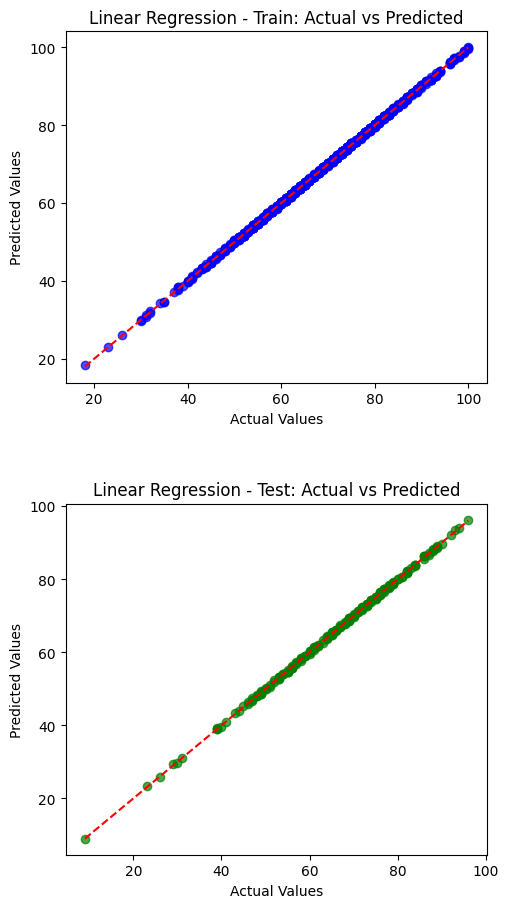

In [ ]:
# Initialize and evaluate Linear Regression
linear_model = LinearRegression()


# Plot for Linear Regression
plot_actual_vs_predicted(y_train, linear_results['train_pred'], y_test, linear_results['test_pred'], "Linear Regression")

**Random Forest Regression**

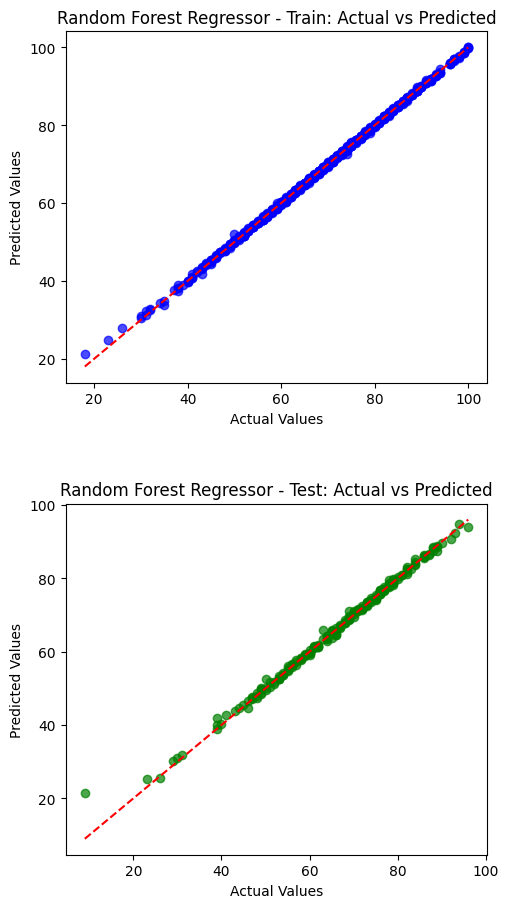

In [ ]:
# Initialize and evaluate Random Forest Regression
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Plot for Random Forest Regression
plot_actual_vs_predicted(y_train, rf_results['train_pred'], y_test, rf_results['test_pred'], "Random Forest Regressor")

#**Conclusion**

Both **Linear Regression** and **Random Forest Regressor** models perform well, but with differences in their results:

- **Linear Regression** offers exceptional predictive accuracy with **R²** values close to 1 (0.9996 for training and 0.9997 for testing), low **MSE** and **MAE**, making it the more reliable model.
- **Random Forest** performs well in training with an **R²** of 0.9995, but its performance on the test set is slightly lower, with **MSE** and **MAE** higher than those of Linear Regression.

- **Linear Regression** is the better-performing model for this dataset, providing more accurate predictions on both training and testing data.
- **Random Forest** also performs well, but its test data accuracy is slightly lower.